In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline
%config IPCompleter.greedy=True

In [13]:
reviews = pd.read_csv('fandango_scores.csv')
reviews.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [33]:
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm',
                       'Fandango_Ratingvalue', 'Fandango_Stars']]
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


# Age Of Ultron Movie Reviews

### Vertical Bar Plot

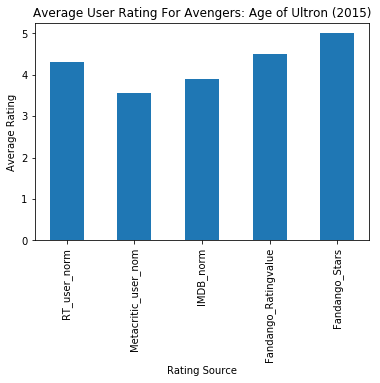

In [39]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm',
                       'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = np.arange(5) + 0.75
tick_positions = np.arange(5) + 0.75

fig,ax = plt.subplots()
ax.bar(bar_positions,bar_heights,0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols,rotation=90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

### Horizontal Bar Plot

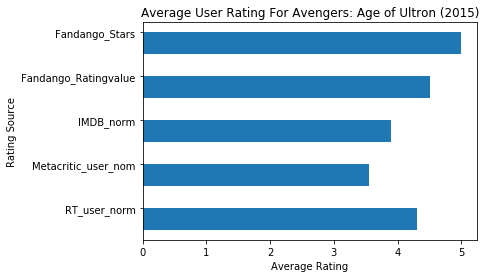

In [42]:
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = np.arange(5) + 0.75
tick_positions = range(1,6)

fig,ax = plt.subplots()
ax.barh(bar_positions,bar_widths,0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

# All Ratings Comparisons

### Scatter Plots

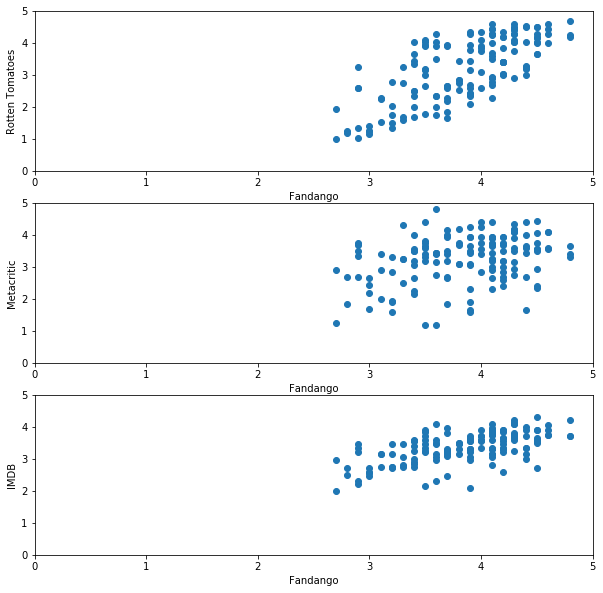

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)


plt.show()

### Histograms

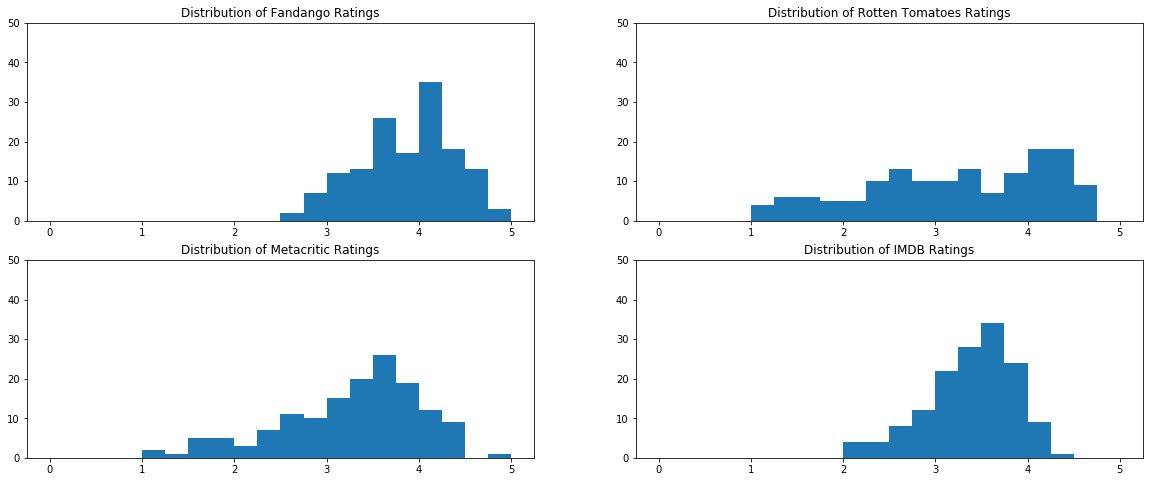

In [12]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'],bins=20,range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)
ax2.hist(norm_reviews['RT_user_norm'],bins=20,range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)
ax3.hist(norm_reviews['Metacritic_user_nom'],bins=20,range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)
ax4.hist(norm_reviews['IMDB_norm'],bins=20,range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)
plt.show()

# Findings

1. Around 50% of user ratings from Fandango fall in the 2 to 4 score range
2. Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
3. Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
4. Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

### Box Plots

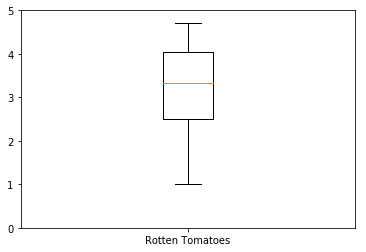

In [14]:
fig,ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0,5)
ax.set_xticklabels(['Rotten Tomatoes'])
plt.show()

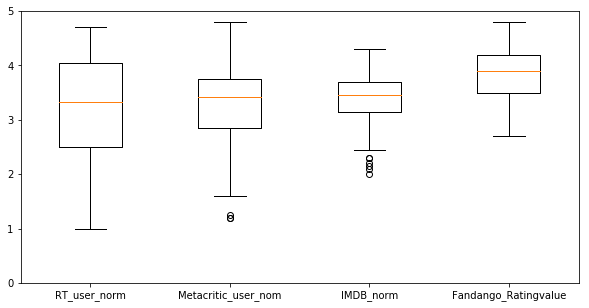

In [17]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols)
ax.set_ylim(0,5)
plt.show()

# Findings

1. user ratings from Rotten Tomatoes and Metacritic span a larger range of values
2. user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values